<a href="https://colab.research.google.com/github/mithunkumarsr/NLPNov21/blob/main/SentAnalysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# install dependencies
!pip install pandas #for data re-processing
!pip install tweepy #for tweeter authentication and data
!pip install vaderSentiment #for sentiment analysis

In [ ]:
import pandas as pd
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#My Twitter API Credentials
consumer_key = ""
consumer_secret = ""
api_key = ""
api_secret = ""

In [ ]:

#Twitter authentication and getting tweets
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(api_key, api_secret)

api = tweepy.API(auth)

tweets = api.search('Apple Watch', count=200)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(0))

,Tweets


In [ ]:
#print some attributes of a tweet
print("ID: ", tweets[0].id)
print("TWEET TEXT: ", tweets[0].text)
print("CREATED AT: ", tweets[0].created_at)
print("SOURCE: ", tweets[0].source)
print("FAVORITE COUNT: ", tweets[0].favorite_count)
print("RETWEET COUNT: ", tweets[0].retweet_count)
print("GEO", tweets[0].geo)
print("COORDINATES: ", tweets[0].coordinates)
print("ENTITIES: ", tweets[0].entities)

ID:  1436480779492552708
TWEET TEXT:  My Apple Watch tells me to breathe in the most stressful times and its either direly needed or extremely annoying
CREATED AT:  2021-09-11 00:04:41
SOURCE:  Twitter for iPhone
FAVORITE COUNT:  0
RETWEET COUNT:  0
GEO None
COORDINATES:  None
ENTITIES:  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [ ]:
#import a LEXICON
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#perform sentiment analysis
sid = SentimentIntensityAnalyzer()

sentiment_scores = []

for index, row in data.iterrows():
  sentiment_score = sid.polarity_scores(row['Tweets'])
  sentiment_scores.append(sentiment_score)
  
score_evaluation = pd.Series(sentiment_scores)
data['Polarity'] = score_evaluation.values

display(data.head(10))

,Tweets,Polarity
0,My Apple Watch tells me to breathe in the most...,"{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'comp..."
1,I took a nap on my break today and left my app...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,I highly recommend to watch this Amazon Prime ...,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
3,OLNL libera o single “왜 (Why)” feat YEYEBEEN! ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,RT @TeamLisaPH: Can we reach 70 million views ...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
5,RT @TeamLisaPH: Can we reach 70 million views ...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
6,Come from away is now on Apple TV. If you have...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,If I don’t watch that Friday’s Ted Lasso by 5 ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,RT @TeamLisaPH: Can we reach 70 million views ...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
9,RT @BLACKPINKENT_: 🎶KEEP STREAMING🎶\n\nMake su...,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp..."


In [ ]:
hashtag = "#ManchesterTest"
query = tweepy.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @pragyanojha: Test cricket at its best! Really enjoyed each and every day of the play as it unfolded during this series. Very unfortunat…', 'Timestamp': datetime.datetime(2021, 9, 11, 0, 2, 46)}, {'Tweet': 'RT @IExpressSports: #INDvENG #ManchesterTest \n\nWith the England and India board in talks till late on Thursday night, the players were keen…', 'Timestamp': datetime.datetime(2021, 9, 10, 23, 52, 20)}, {'Tweet': 'RT @timesofindia: #INDvsENG #ENGvIND #5thTest #ManchesterTest \n\nDid coach #RaviShastri and skipper #ViratKohli pay enough heed to @BCCI dik…', 'Timestamp': datetime.datetime(2021, 9, 10, 23, 52)}, {'Tweet': 'RT @markpougatch: So if the IPL weren’t resuming in nine days time, would the 5th Test have gone head? Those paying good money to go to Old…', 'Timestamp': datetime.datetime(2021, 9, 10, 23, 49, 15)}, {'Tweet': 'RT @markpougatch: So if the IPL weren’t resuming in nine days time, would the 5th Test have gone head? Those paying good money to go to Old…',

In [ ]:
india_handle = ['India','Ravi', 'Shastri', 'Virat', 'BCCI', 'IPL']
england_handle = ['England', 'ECB', 'Anderson']

In [ ]:

df = pd.DataFrame.from_dict(tweets)
df.head()

def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['India'] = df['Tweet'].apply(lambda x: identify_subject(x, india_handle)) 
df['England'] = df['Tweet'].apply(lambda x: identify_subject(x, england_handle))
df.head(10)

,Tweet,Timestamp,India,England
0,RT @pragyanojha: Test cricket at its best! Rea...,2021-09-11 00:02:46,0,0
1,RT @IExpressSports: #INDvENG #ManchesterTest \...,2021-09-10 23:52:20,1,1
2,RT @timesofindia: #INDvsENG #ENGvIND #5thTest ...,2021-09-10 23:52:00,1,0
3,RT @markpougatch: So if the IPL weren’t resumi...,2021-09-10 23:49:15,1,0
4,RT @markpougatch: So if the IPL weren’t resumi...,2021-09-10 23:42:46,1,0
5,RT @mmonlinebet: #ManchesterTest Is Postponed....,2021-09-10 23:35:28,0,0
6,मैनचैस्टर टेस्ट पोस्टपोन होने पर बोले ईसीबी सी...,2021-09-10 23:25:16,0,1
7,RT @thenewsminute: India vs England Manchester...,2021-09-10 23:23:57,1,1
8,RT @gikkukrishnan: https://t.co/CxO1K370XD\n@M...,2021-09-10 23:18:59,0,0
9,RT @markpougatch: So if the IPL weren’t resumi...,2021-09-10 23:17:46,1,0


In [ ]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#ManchesterTest']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,India,England,Processed Tweet
0,RT @pragyanojha: Test cricket at its best! Rea...,2021-09-11 00:02:46,0,0,@pragyanojha: Test cricket best! Really enjoye...
1,RT @IExpressSports: #INDvENG #ManchesterTest \...,2021-09-10 23:52:20,1,1,@IExpressSports: #INDvENG With England India b...
2,RT @timesofindia: #INDvsENG #ENGvIND #5thTest ...,2021-09-10 23:52:00,1,0,@timesofindia: #INDvsENG #ENGvIND #5thTest Did...
3,RT @markpougatch: So if the IPL weren’t resumi...,2021-09-10 23:49:15,1,0,@markpougatch: So IPL weren’t resuming nine da...
4,RT @markpougatch: So if the IPL weren’t resumi...,2021-09-10 23:42:46,1,0,@markpougatch: So IPL weren’t resuming nine da...


In [ ]:

print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @pragyanojha: Test cricket at its best! Really enjoyed each and every day of the play as it unfolded during this series. Very unfortunat…

------------------------------------

Cleaned and lemmatized review
 @pragyanojha: Test cricket best! Really enjoyed every day play unfolded series. Very unfortunat…


In [ ]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'England', 'India', 'polarity', 'subjectivity']].head()

,Processed Tweet,England,India,polarity,subjectivity
0,@pragyanojha: Test cricket best! Really enjoye...,0,0,0.566667,0.433333
1,@IExpressSports: #INDvENG With England India b...,1,1,-0.300000,0.600000
2,@timesofindia: #INDvsENG #ENGvIND #5thTest Did...,0,1,0.000000,0.500000
3,@markpougatch: So IPL weren’t resuming nine da...,0,1,0.700000,0.600000
4,@markpougatch: So IPL weren’t resuming nine da...,0,1,0.700000,0.600000


In [ ]:
import numpy as np

display(df[df['India']==1][['India','polarity','subjectivity']].groupby('India').agg([np.mean, np.max, np.min, np.median]))
df[df['England']==1][['England','polarity','subjectivity']].groupby('England').agg([np.mean, np.max, np.min, np.median])

polarity                   subjectivity                 
           mean amax  amin median         mean amax amin median
India                                                          
1      0.231621  1.0 -0.75    0.0     0.387761  1.0  0.0    0.5

polarity                  subjectivity                    
             mean amax amin median         mean amax amin    median
England                                                            
1        0.030836  1.0 -0.5    0.0     0.387523  1.0  0.0  0.377778

In [ ]:
england = df[df['England']==1][['Timestamp', 'polarity']]
england = england.sort_values(by='Timestamp', ascending=True)
england['MA Polarity'] = england.polarity.rolling(10, min_periods=3).mean()

india = df[df['India']==1][['Timestamp', 'polarity']]
india = india.sort_values(by='Timestamp', ascending=True)
india['MA Polarity'] = india.polarity.rolling(10, min_periods=3).mean()

In [ ]:
india.head()

,Timestamp,polarity,MA Polarity
998,2021-09-10 12:33:54,0.7,NaN
997,2021-09-10 12:34:01,0.7,NaN
996,2021-09-10 12:34:09,0.0,0.466667
995,2021-09-10 12:34:34,0.0,0.350000
994,2021-09-10 12:34:52,0.0,0.280000


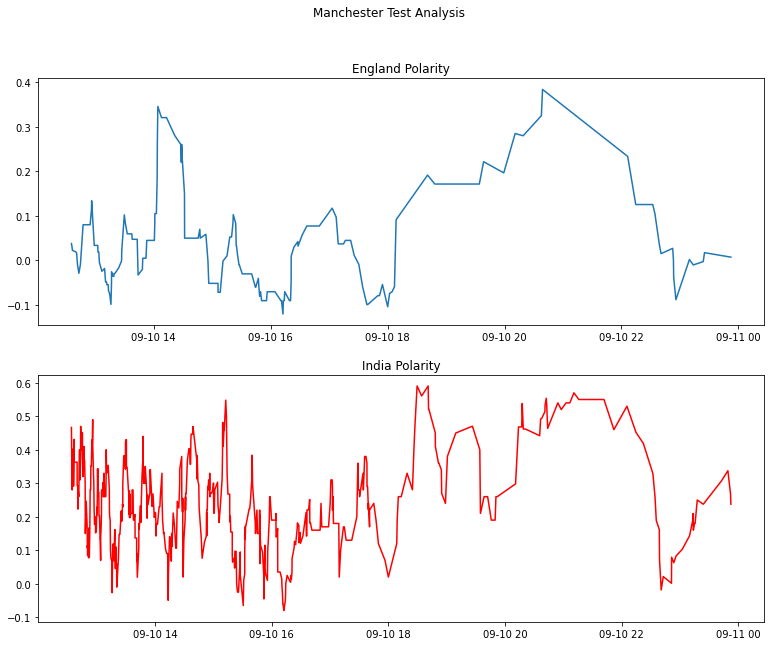

In [ ]:
# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt
ind = 'red'
eng = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(england['Timestamp'], england['MA Polarity'])
axes[0].set_title("\n".join(["England Polarity"]))
axes[1].plot(india['Timestamp'], india['MA Polarity'], color='red')
axes[1].set_title("\n".join(["India Polarity"]))

fig.suptitle("\n".join(["Manchester Test Analysis"]), y=0.98)

plt.show()